<a href="https://colab.research.google.com/github/RohanKulkarni100/StockPricePrediction/blob/main/Trending_Chart_Pattern_Analysis(Minded_Hack)_Sample_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ChartPatterns/SampleData2.csv")

In [ ]:
df.columns

Index(['Unnamed: 0', 'open', 'close', 'high', 'low', 'date'], dtype='object')

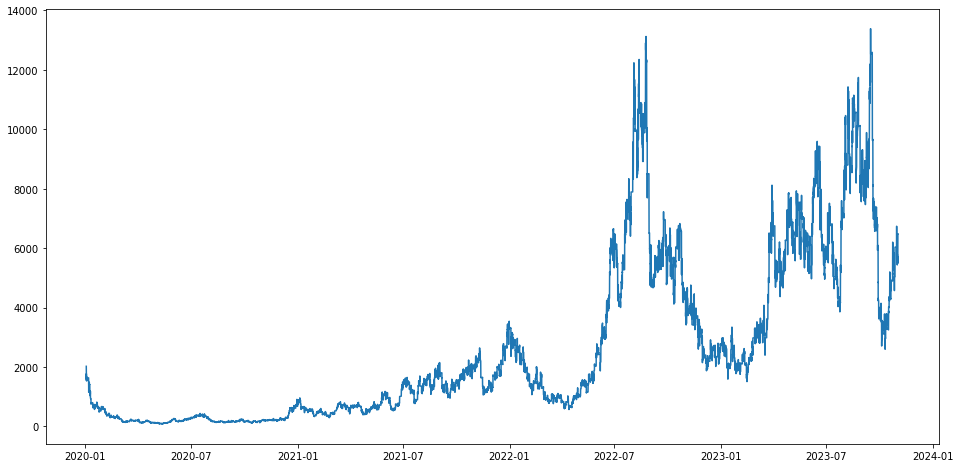

In [ ]:
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['date']
plt.figure(figsize=(16,8))
plt.plot(df["open"],label='Close Price history')

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','open'])
for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["open"][i]=data["open"][i]

In [ ]:
# Splitting the date part from DataFrame
df['Date'] = [d.date() for d in df['date']]

# Splitting the time part from DataFrame
df['Time'] = [d.time() for d in df['date']]

In [ ]:
df.head()

,Unnamed: 0,open,close,high,low,date,Date,Time
date,,,,,,,,
2020-01-02 09:00:00,0,2022.544200,2019.870166,2034.325763,2008.088603,2020-01-02 09:00:00,2020-01-02,09:00:00
2020-01-02 09:05:00,1,2019.870166,2012.536682,2027.446804,2004.960044,2020-01-02 09:05:00,2020-01-02,09:05:00
2020-01-02 09:10:00,2,2012.536682,2012.895040,2020.670503,2004.761220,2020-01-02 09:10:00,2020-01-02,09:10:00
2020-01-02 09:15:00,3,2012.895040,2004.637193,2022.091425,1995.440808,2020-01-02 09:15:00,2020-01-02,09:15:00
2020-01-02 09:20:00,4,2004.637193,1996.934699,2016.649114,1984.922778,2020-01-02 09:20:00,2020-01-02,09:20:00


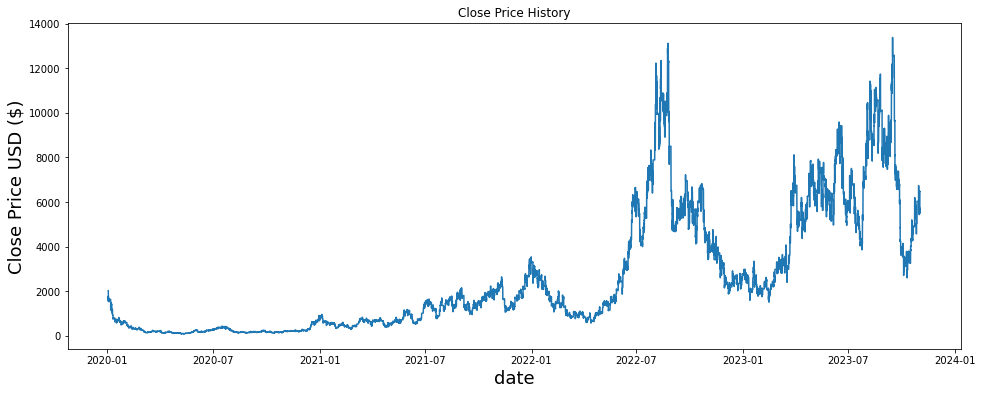

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['open'])
plt.xlabel('date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['open'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

68369

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.14471838],
       [0.14417145],
       [0.14419818],
       ...,
       [0.47588841],
       [0.4774585 ],
       [0.4783148 ]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.14471838, 0.14417145, 0.14419818, 0.14358231, 0.14300786,
       0.14287134, 0.14211392, 0.14263285, 0.14195146, 0.14121428,
       0.14156579, 0.14023621, 0.14075293, 0.14009663, 0.13918113,
       0.13916641, 0.13914888, 0.13913658, 0.1391269 , 0.1390861 ,
       0.13908642, 0.13752925, 0.13543249, 0.13673867, 0.13518717,
       0.13440196, 0.13367012, 0.13172614, 0.13114252, 0.13095611,
       0.13024989, 0.13060139, 0.13002034, 0.12971515, 0.12895314,
       0.12917999, 0.12790776, 0.12668654, 0.12631239, 0.12532824,
       0.12631699, 0.12437065, 0.12346725, 0.12371777, 0.12379838,
       0.12391396, 0.12384681, 0.12404565, 0.12405916, 0.12413468,
       0.1242251 , 0.12414352, 0.1242264 , 0.12363668, 0.12006934,
       0.12040842, 0.11841963, 0.11780395, 0.11706868, 0.11691937])]
[0.11627106216499465]

[array([0.14471838, 0.14417145, 0.14419818, 0.14358231, 0.14300786,
       0.14287134, 0.14211392, 0.14263285, 0.14195146, 0.14121428,
       0.14156579, 0.14023621, 0.14

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

68309/68309 [==============================] - 2796s 41ms/step - loss: 9.8352e-05


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

113/113 [==============================] - 8s 56ms/step


64.39738026927184

<ipython-input-17-fe6985792a52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


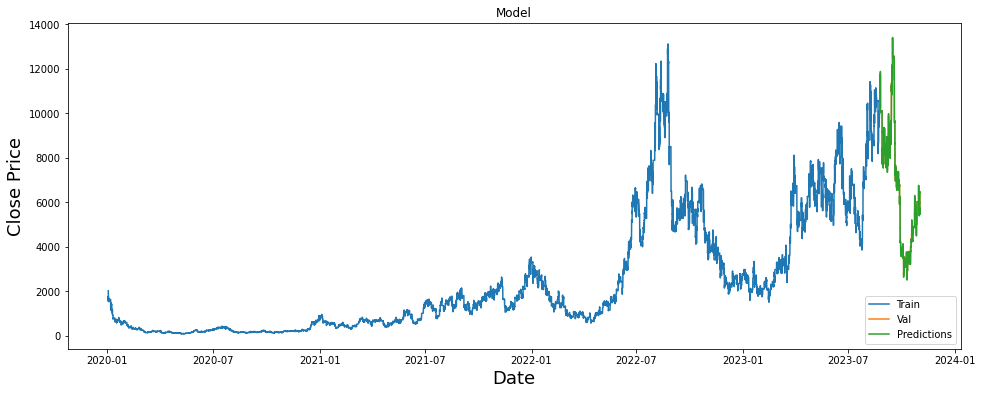

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['open'])
plt.plot(valid[['open', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,open,Predictions
date,,
2023-08-24 09:10:00,10062.480348,10040.271484
2023-08-24 09:15:00,10060.834508,10040.447266
2023-08-24 09:20:00,10097.450393,10086.300781
2023-08-24 09:25:00,10116.944032,10107.756836
2023-08-24 09:30:00,10140.120190,10127.692383
...,...,...
2023-11-01 14:35:00,6454.450300,6437.793945
2023-11-01 14:40:00,6453.972091,6436.180176
2023-11-01 14:45:00,6454.864821,6432.845215
